<a href="https://colab.research.google.com/github/AnkitaPrasad92/Ankita_Ridewise/blob/main/Ankita_Ridewise1000.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from google.colab import files
import zipfile

# Upload zip file
uploaded = files.upload()

# Extract zip file
with zipfile.ZipFile("archive.zip", 'r') as zip_ref:
    zip_ref.extractall("bike_sharing_dataset")

Saving archive.zip to archive.zip


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [5]:
# Load dataset (hour.csv)
df = pd.read_csv("bike_sharing_dataset/hour.csv")
df_day = pd.read_csv("bike_sharing_dataset/day.csv")

In [6]:
print(df_day.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


In [7]:
# Dataset info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


In [9]:
# Summary statistics
print(df.describe())
print(df_day.describe())


          instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.

In [10]:
# Check for missing values
print(df.isnull().sum())
print(df_day.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [11]:
 # Drop irrelevant columns (instant is just an index, dteday duplicate of date, casual & registered not for prediction)
df = df.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)
df_day = df_day.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)

In [12]:
# 2. Data quality checks
print("Missing values per column:\n", df.isnull().sum())
print("\nDuplicate rows:", df.duplicated().sum())
print("Missing values per column:\n", df_day.isnull().sum())
print("\nDuplicate rows:", df_day.duplicated().sum())


Missing values per column:
 season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

Duplicate rows: 2
Missing values per column:
 season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

Duplicate rows: 0


In [13]:
  # 3. Feature Engineering
  df['is_weekend'] = df['weekday'].apply(lambda x: 1 if x in [0,6] else 0)   # 0=Sunday, 6=Saturday
  df['is_peak_hour'] = df['hr'].apply(lambda x: 1 if x in [7,8,9,17,18,19] else 0)
  df['temp_feels_diff'] = df['atemp'] - df['temp']

In [14]:
df_day['is_weekend'] = df_day['weekday'].apply(lambda x: 1 if x in [0,6] else 0)
df_day['temp_feels_diff'] = df_day['atemp'] - df_day['temp']
df_day['is_summer_or_winter'] = df_day['season'].apply(lambda x: 1 if x in [2,3] else 0)

In [15]:
# Convert categorical variables
categorical_cols = ['season','yr','mnth','hr','holiday','weekday','workingday','weathersit']
df[categorical_cols] = df[categorical_cols].astype('category')
categorical_cols_day = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
df_day[categorical_cols_day] = df_day[categorical_cols_day].astype('category')


In [16]:
#One-hot encode categorical features
df_encoded = pd.get_dummies(df, drop_first=True)
df_day_encoded = pd.get_dummies(df_day, drop_first=True)  # for day.csv

In [18]:
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name}")
    print(f"  MAE      : {mae:.2f}")
    print(f"  RMSE     : {rmse:.2f}")
    print(f"  R² Score : {r2:.4f}")
    print("-"*40)

In [20]:
print("\n=== Gradient Boosting: Hour Dataset ===")

# Features & Target
X_hour = df_encoded.drop('cnt', axis=1)
y_hour = df_encoded['cnt']

# Train-test split
Xh_train, Xh_test, yh_train, yh_test = train_test_split(
    X_hour, y_hour, test_size=0.2, random_state=42
)

# Train Gradient Boosting
gbr_hour = GradientBoostingRegressor(random_state=42)
gbr_hour.fit(Xh_train, yh_train)

# Predictions & Evaluation
yh_train_pred = gbr_hour.predict(Xh_train)
yh_test_pred = gbr_hour.predict(Xh_test)

evaluate_model(yh_train, yh_train_pred, "Hour - Train")
evaluate_model(yh_test, yh_test_pred, "Hour - Test")




=== Gradient Boosting: Hour Dataset ===
Hour - Train
  MAE      : 52.89
  RMSE     : 73.30
  R² Score : 0.8382
----------------------------------------
Hour - Test
  MAE      : 52.48
  RMSE     : 72.36
  R² Score : 0.8346
----------------------------------------



Top 10 Features (Hour Dataset):
         Feature  Importance
5   is_peak_hour    0.219989
0           temp    0.119840
52  workingday_1    0.113708
1          atemp    0.097272
10          yr_1    0.093491
2            hum    0.085045
38         hr_17    0.044126
37         hr_16    0.024368
39         hr_18    0.023985
4     is_weekend    0.019504


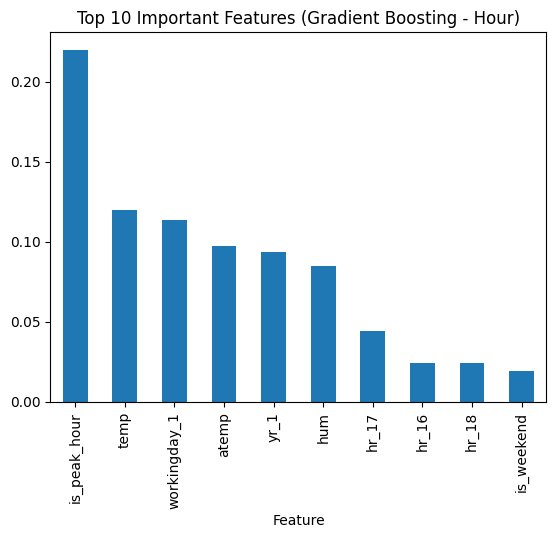

In [21]:
# Feature Importance
feat_imp_hour = pd.DataFrame({
    "Feature": Xh_train.columns,
    "Importance": gbr_hour.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\nTop 10 Features (Hour Dataset):")
print(feat_imp_hour.head(10))

feat_imp_hour.head(10).plot(kind="bar", x="Feature", y="Importance", legend=False)
plt.title("Top 10 Important Features (Gradient Boosting - Hour)")
plt.show()


In [22]:
print("\n=== Gradient Boosting: Day Dataset ===")

# Features & Target
X_day = df_day_encoded.drop('cnt', axis=1)
y_day = df_day_encoded['cnt']

# Train-test split
Xd_train, Xd_test, yd_train, yd_test = train_test_split(
    X_day, y_day, test_size=0.2, random_state=42
)

# Train Gradient Boosting
gbr_day = GradientBoostingRegressor(random_state=42)
gbr_day.fit(Xd_train, yd_train)

# Predictions & Evaluation
yd_train_pred = gbr_day.predict(Xd_train)
yd_test_pred = gbr_day.predict(Xd_test)

evaluate_model(yd_train, yd_train_pred, "Day - Train")
evaluate_model(yd_test, yd_test_pred, "Day - Test")



=== Gradient Boosting: Day Dataset ===
Day - Train
  MAE      : 302.19
  RMSE     : 405.68
  R² Score : 0.9551
----------------------------------------
Day - Test
  MAE      : 467.48
  RMSE     : 674.85
  R² Score : 0.8864
----------------------------------------



Top 10 Features (Day Dataset):
            Feature  Importance
0              temp    0.418973
10             yr_1    0.297546
1             atemp    0.086083
2               hum    0.059787
9          season_4    0.052022
3         windspeed    0.025758
31     weathersit_3    0.015105
5   temp_feels_diff    0.007169
29     workingday_1    0.006778
30     weathersit_2    0.006579


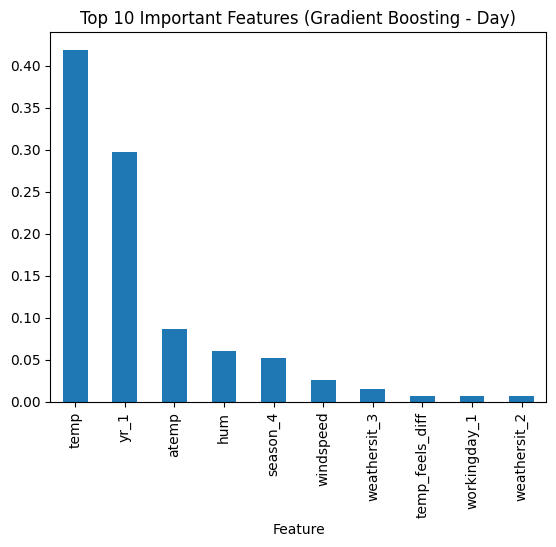

In [23]:

# Feature Importance
feat_imp_day = pd.DataFrame({
    "Feature": Xd_train.columns,
    "Importance": gbr_day.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\nTop 10 Features (Day Dataset):")
print(feat_imp_day.head(10))

feat_imp_day.head(10).plot(kind="bar", x="Feature", y="Importance", legend=False)
plt.title("Top 10 Important Features (Gradient Boosting - Day)")
plt.show()

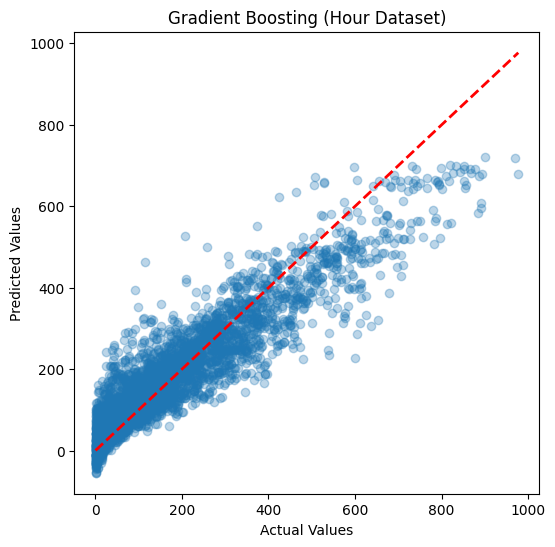

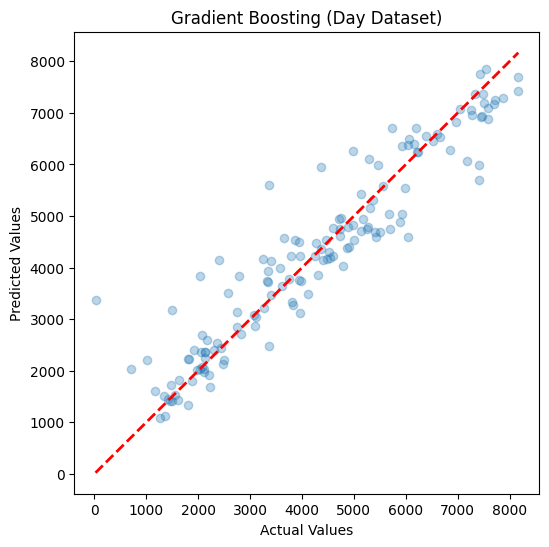

In [24]:
# ===============================
# Scatter Plot: Actual vs Predicted
# ===============================
import matplotlib.pyplot as plt

def plot_actual_vs_pred(y_true, y_pred, title):
    plt.figure(figsize=(6,6))
    plt.scatter(y_true, y_pred, alpha=0.3)
    plt.plot([y_true.min(), y_true.max()],
             [y_true.min(), y_true.max()],
             color="red", linestyle="--", linewidth=2)  # perfect prediction line
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(title)
    plt.show()

# Hour Dataset Scatter
plot_actual_vs_pred(yh_test, yh_test_pred, "Gradient Boosting (Hour Dataset)")

# Day Dataset Scatter
plot_actual_vs_pred(yd_test, yd_test_pred, "Gradient Boosting (Day Dataset)")


In [25]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

# Parameter grid
param_dist = {
    "n_estimators": [100, 200, 500],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [3, 5, 7],
    "subsample": [0.6, 0.8, 1.0],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# Initialize model
gbr = GradientBoostingRegressor(random_state=42)

# Randomized search
random_search_gbr = RandomizedSearchCV(
    estimator=gbr,
    param_distributions=param_dist,
    n_iter=20,   # number of random combinations to try
    cv=3,
    scoring="neg_root_mean_squared_error",
    random_state=42,
    n_jobs=-1,
    verbose=2
)

# Fit on training data (for hour dataset as example)
random_search_gbr.fit(Xh_train, yh_train)

print("✅ Best Parameters (Hour):", random_search_gbr.best_params_)

# Evaluate tuned model
best_gbr = random_search_gbr.best_estimator_

yh_train_pred = best_gbr.predict(Xh_train)
yh_test_pred = best_gbr.predict(Xh_test)

print("\n=== Gradient Boosting (Tuned - Hour) ===")
evaluate_model(yh_train, yh_train_pred, "Train")
evaluate_model(yh_test, yh_test_pred, "Test")


Fitting 3 folds for each of 20 candidates, totalling 60 fits
✅ Best Parameters (Hour): {'subsample': 0.8, 'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 7, 'learning_rate': 0.1}

=== Gradient Boosting (Tuned - Hour) ===
Train
  MAE      : 12.17
  RMSE     : 18.53
  R² Score : 0.9897
----------------------------------------
Test
  MAE      : 27.21
  RMSE     : 43.01
  R² Score : 0.9416
----------------------------------------


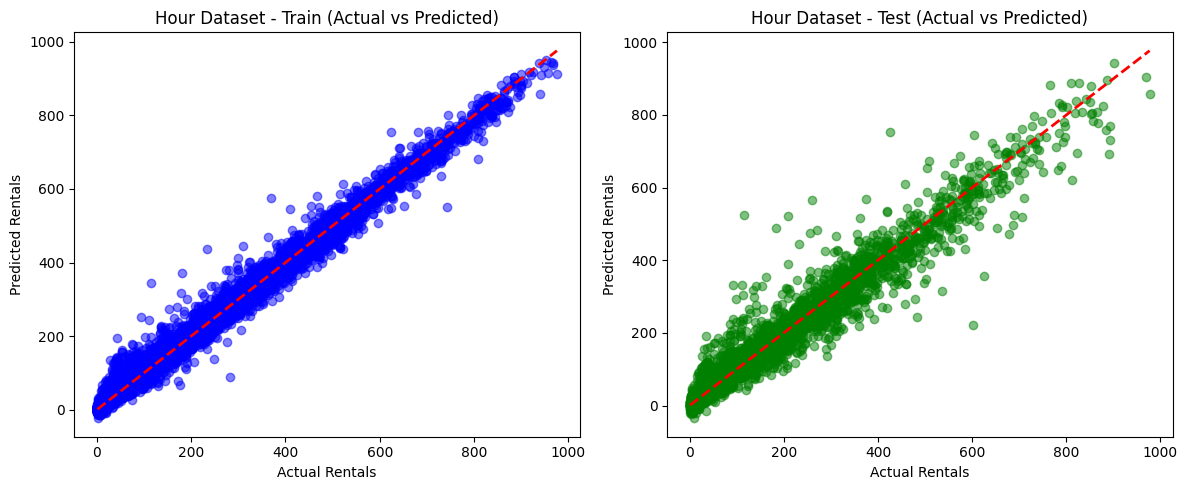

In [28]:
plt.figure(figsize=(12,5))

# Train
plt.subplot(1,2,1)
plt.scatter(yh_train, yh_train_pred, alpha=0.5, color="blue")
plt.plot([yh_train.min(), yh_train.max()],
         [yh_train.min(), yh_train.max()], 'r--', lw=2)
plt.xlabel("Actual Rentals")
plt.ylabel("Predicted Rentals")
plt.title("Hour Dataset - Train (Actual vs Predicted)")

# Test
plt.subplot(1,2,2)
plt.scatter(yh_test, yh_test_pred, alpha=0.5, color="green")
plt.plot([yh_test.min(), yh_test.max()],
         [yh_test.min(), yh_test.max()], 'r--', lw=2)
plt.xlabel("Actual Rentals")
plt.ylabel("Predicted Rentals")
plt.title("Hour Dataset - Test (Actual vs Predicted)")

plt.tight_layout()
plt.show()

In [26]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define parameter space
param_dist = {
    "n_estimators": [100, 200, 300, 500],
    "learning_rate": [0.05, 0.1, 0.2],
    "max_depth": [3, 4, 5],
    "min_samples_split": [5, 10, 20],
    "min_samples_leaf": [5, 10, 20],
    "subsample": [0.7, 0.8, 0.9, 1.0],
    "max_features": ["sqrt", "log2", None]
}

# Initialize model
gbr = GradientBoostingRegressor(random_state=42)

# Randomized Search
random_search_day = RandomizedSearchCV(
    estimator=gbr,
    param_distributions=param_dist,
    n_iter=30,        # number of random parameter sets to try
    cv=3,
    scoring="neg_root_mean_squared_error",
    random_state=42,
    n_jobs=-1,
    verbose=2
)

# Fit on Day training data
random_search_day.fit(Xd_train, yd_train)

print("✅ Best Parameters (Day Dataset):", random_search_day.best_params_)

# Best model
best_gbr_day = random_search_day.best_estimator_

# Evaluate
y_train_pred = best_gbr_day.predict(Xd_train)
y_test_pred = best_gbr_day.predict(Xd_test)

print("\n=== Gradient Boosting (Tuned - Day, Regularized) ===")
evaluate_model(yd_train, y_train_pred, "Train")
evaluate_model(yd_test, y_test_pred, "Test")


Fitting 3 folds for each of 30 candidates, totalling 90 fits
✅ Best Parameters (Day Dataset): {'subsample': 1.0, 'n_estimators': 300, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'max_depth': 5, 'learning_rate': 0.05}

=== Gradient Boosting (Tuned - Day, Regularized) ===
Train
  MAE      : 222.77
  RMSE     : 303.29
  R² Score : 0.9749
----------------------------------------
Test
  MAE      : 439.00
  RMSE     : 654.44
  R² Score : 0.8932
----------------------------------------


In [27]:
gbr_day_tuned = GradientBoostingRegressor(
    n_estimators=200,        # fewer trees
    learning_rate=0.05,      # slower learning
    max_depth=3,             # shallower trees
    min_samples_split=10,
    min_samples_leaf=5,
    subsample=0.8,           # stochastic boosting
    max_features="sqrt",     # fewer features per split
    random_state=42
)

gbr_day_tuned.fit(Xd_train, yd_train)

evaluate_model(yd_train, gbr_day_tuned.predict(Xd_train), "Train")
evaluate_model(yd_test, gbr_day_tuned.predict(Xd_test), "Test")


Train
  MAE      : 366.24
  RMSE     : 492.36
  R² Score : 0.9339
----------------------------------------
Test
  MAE      : 477.70
  RMSE     : 669.46
  R² Score : 0.8882
----------------------------------------


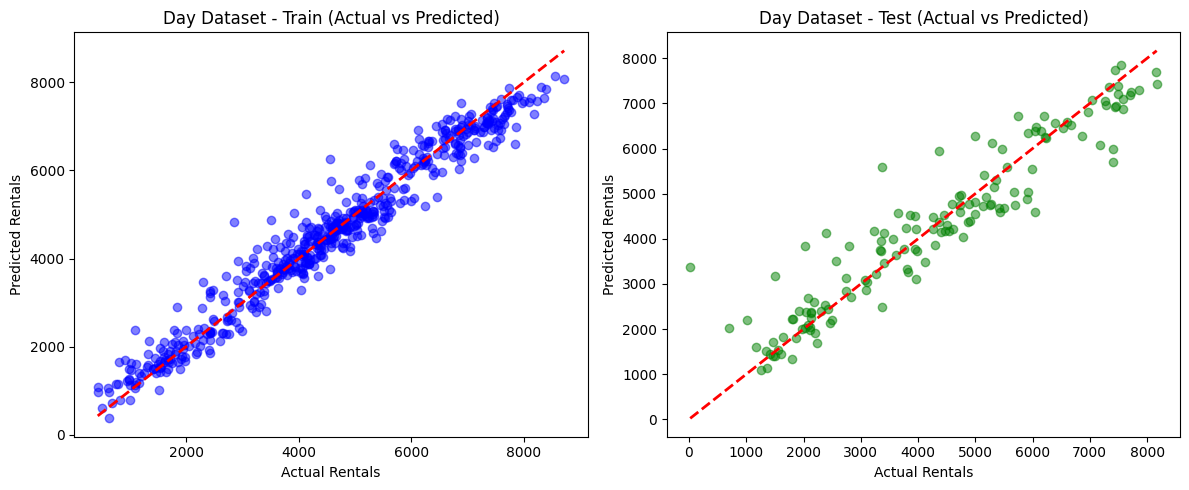

In [29]:
plt.figure(figsize=(12,5))

# Train
plt.subplot(1,2,1)
plt.scatter(yd_train, yd_train_pred, alpha=0.5, color="blue")
plt.plot([yd_train.min(), yd_train.max()],
         [yd_train.min(), yd_train.max()], 'r--', lw=2)
plt.xlabel("Actual Rentals")
plt.ylabel("Predicted Rentals")
plt.title("Day Dataset - Train (Actual vs Predicted)")

# Test
plt.subplot(1,2,2)
plt.scatter(yd_test, yd_test_pred, alpha=0.5, color="green")
plt.plot([yd_test.min(), yd_test.max()],
         [yd_test.min(), yd_test.max()], 'r--', lw=2)
plt.xlabel("Actual Rentals")
plt.ylabel("Predicted Rentals")
plt.title("Day Dataset - Test (Actual vs Predicted)")

plt.tight_layout()
plt.show()

In [31]:
# =========================================================
# Inference on Test Data (Hour Dataset)
# =========================================================
print("\n=== Inference: Hour Dataset Test Set ===")
yh_test_pred = gbr_hour.predict(Xh_test)
evaluate_model(yh_test, yh_test_pred, "Hour - Test (Final Inference)")

# =========================================================
# Inference on Test Data (Day Dataset)
# =========================================================
print("\n=== Inference: Day Dataset Test Set ===")
yd_test_pred = gbr_day.predict(Xd_test)
evaluate_model(yd_test, yd_test_pred, "Day - Test (Final Inference)")



=== Inference: Hour Dataset Test Set ===
Hour - Test (Final Inference)
  MAE      : 52.48
  RMSE     : 72.36
  R² Score : 0.8346
----------------------------------------

=== Inference: Day Dataset Test Set ===
Day - Test (Final Inference)
  MAE      : 467.48
  RMSE     : 674.85
  R² Score : 0.8864
----------------------------------------


In [35]:
# Suppose you used pd.get_dummies() on training data
new_hour_sample = pd.DataFrame([{
    "season": 2,
    "holiday": 0,
    "workingday": 1,
    "weather": 1,
    "temp": 0.32,
    "atemp": 0.31,
    "hum": 0.80,
    "windspeed": 0.12,
    "hr": 17   # hour of day (important, since you had hr_* columns)
}])

# Apply the same one-hot encoding as training
new_hour_sample_encoded = pd.get_dummies(new_hour_sample)

# Align with training features (add missing columns as 0)
new_hour_sample_encoded = new_hour_sample_encoded.reindex(
    columns=X_hour.columns, fill_value=0
)

# Predict
new_hour_prediction = gbr_hour.predict(new_hour_sample_encoded)
print("Predicted rentals (Hour Sample):", int(new_hour_prediction[0]))


Predicted rentals (Hour Sample): 42


In [34]:

new_day_sample = pd.DataFrame([{
    "season": 3,       # Winter
    "yr": 1,           # Second year (2012 if dataset is 2011-2012)
    "mnth": 12,        # December
    "holiday": 0,      # Not a holiday
    "weekday": 2,      # Tuesday
    "workingday": 1,   # Working day
    "weathersit": 1,   # Clear weather
    "temp": 0.25,      # Normalized temp (around 10-12°C if scaled)
    "atemp": 0.27,     # Feels-like temp
    "hum": 0.60,       # 60% humidity
    "windspeed": 0.20  # Normalized windspeed
}])

# Apply same encoding as training
new_day_sample_encoded = pd.get_dummies(new_day_sample)

# Align with training columns
new_day_sample_encoded = new_day_sample_encoded.reindex(
    columns=X_day.columns, fill_value=0
)

# Predict
new_day_prediction = gbr_day.predict(new_day_sample_encoded)
print(" Predicted rentals (Day Sample):", int(new_day_prediction[0]))




 Predicted rentals (Day Sample): 1689


In [38]:
# Hour dataset final evaluation
yh_test_pred = best_gbr.predict(Xh_test)
print("\n=== Final Gradient Boosting Results (Hour Dataset) ===")
evaluate_model(yh_test, yh_test_pred, "Hour - Test (Final)")

# Day dataset final evaluation
yd_test_pred = best_gbr_day.predict(Xd_test)
print("\n=== Final Gradient Boosting Results (Day Dataset) ===")
evaluate_model(yd_test, yd_test_pred, "Day - Test (Final)")



=== Final Gradient Boosting Results (Hour Dataset) ===
Hour - Test (Final)
  MAE      : 27.21
  RMSE     : 43.01
  R² Score : 0.9416
----------------------------------------

=== Final Gradient Boosting Results (Day Dataset) ===
Day - Test (Final)
  MAE      : 439.00
  RMSE     : 654.44
  R² Score : 0.8932
----------------------------------------


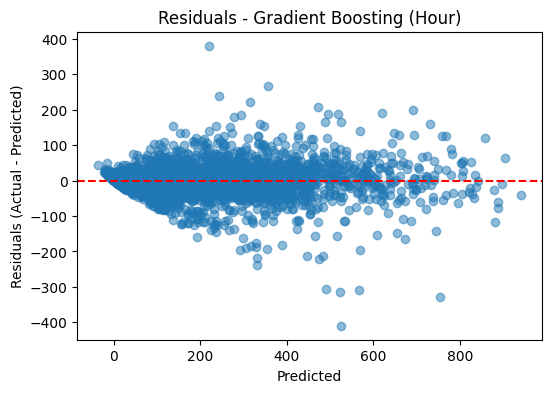

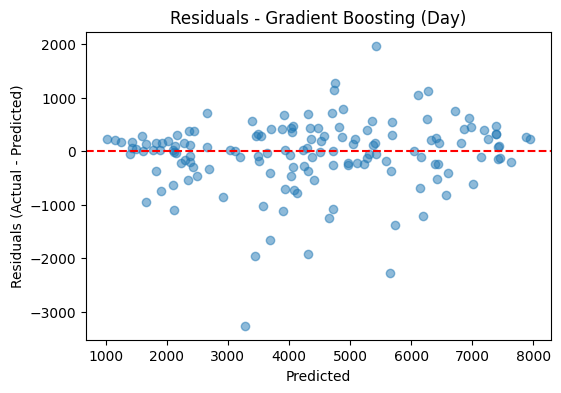

In [39]:
def plot_residuals(y_true, y_pred, title):
    residuals = y_true - y_pred
    plt.figure(figsize=(6,4))
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.axhline(y=0, color="red", linestyle="--")
    plt.xlabel("Predicted")
    plt.ylabel("Residuals (Actual - Predicted)")
    plt.title(title)
    plt.show()

# Hour dataset residuals
plot_residuals(yh_test, yh_test_pred, "Residuals - Gradient Boosting (Hour)")

# Day dataset residuals
plot_residuals(yd_test, yd_test_pred, "Residuals - Gradient Boosting (Day)")


=== Top Features (Hour Dataset) ===
         Feature  Importance
5   is_peak_hour    0.203776
1          atemp    0.107260
52  workingday_1    0.090931
0           temp    0.089888
10          yr_1    0.089515
2            hum    0.084192
30          hr_9    0.024018
4     is_weekend    0.023811
37         hr_16    0.021362
9       season_4    0.019361


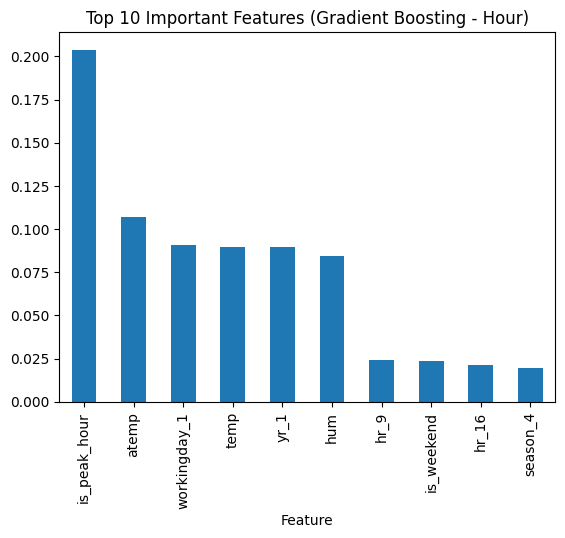

In [41]:
importances_hour = pd.DataFrame({
    "Feature": Xh_train.columns,
    "Importance": best_gbr.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("=== Top Features (Hour Dataset) ===")
print(importances_hour.head(10))

importances_hour.head(10).plot(kind="bar", x="Feature", y="Importance", legend=False)
plt.title("Top 10 Important Features (Gradient Boosting - Hour)")
plt.show()




=== Top Features (Day Dataset) ===
                Feature  Importance
10                 yr_1    0.277010
0                  temp    0.225780
1                 atemp    0.152925
2                   hum    0.062374
3             windspeed    0.041526
9              season_4    0.040787
5       temp_feels_diff    0.037971
6   is_summer_or_winter    0.030425
31         weathersit_3    0.023131
11               mnth_2    0.021257


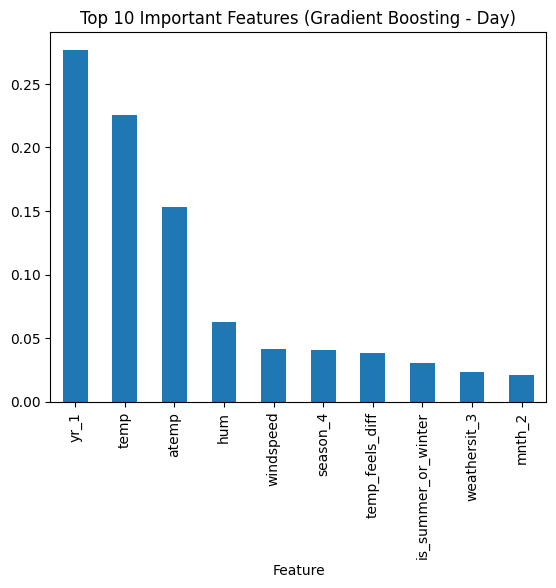

In [42]:
importances_day = pd.DataFrame({
    "Feature": Xd_train.columns,
    "Importance": best_gbr_day.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\n=== Top Features (Day Dataset) ===")
print(importances_day.head(10))

importances_day.head(10).plot(kind="bar", x="Feature", y="Importance", legend=False)
plt.title("Top 10 Important Features (Gradient Boosting - Day)")
plt.show()

In [43]:
import joblib

# Save final Gradient Boosting models
joblib.dump(best_gbr, "final_gbr_hour.pkl")
joblib.dump(best_gbr_day, "final_gbr_day.pkl")

print("✅ Final Gradient Boosting models saved successfully!")


✅ Final Gradient Boosting models saved successfully!


In [44]:
# Example: Hour dataset sample (evening, clear weather, working day)
new_hour_sample = pd.DataFrame([{
    "season": 2,
    "holiday": 0,
    "workingday": 1,
    "weather": 1,
    "temp": 0.32,
    "atemp": 0.31,
    "hum": 0.60,
    "windspeed": 0.15,
    "hr": 18
}])

# Align with training columns
new_hour_sample = new_hour_sample.reindex(columns=Xh_train.columns, fill_value=0)

prediction_hour = best_gbr.predict(new_hour_sample)
print("🚲 Predicted rentals (Hour scenario):", int(prediction_hour[0]))


🚲 Predicted rentals (Hour scenario): 13
